# Grafo tridimensional

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Definir archivos a usar

In [2]:
excel_conectividad = r"/Users/Maca/Desktop/Todo todo/UNAM/5º Semestre/Modelos computacionales I/Neurociencias-2026-1/S03_datasets/EEG.xlsx"
excel_coordenadas = r"/Users/Maca/Desktop/Todo todo/UNAM/5º Semestre/Modelos computacionales I/Neurociencias-2026-1/S03_datasets/EEG_3D_coordinates.xlsx"

Archivos excel como diccionarios

In [3]:
conectividad_dict = pd.read_excel(excel_conectividad, sheet_name = None)
coordenadas_dict = pd.read_excel(excel_coordenadas, sheet_name = None)

Selecciono la posición de la hoja que se va a leer

In [7]:
motor_df = conectividad_dict[list(conectividad_dict.keys())[0]]
coordenadas_df = coordenadas_dict[list(coordenadas_dict.keys())[0]]

Redefinir el índice para poder convertirlo a grafo de forma más fácil

In [10]:
motor_df.set_index("Unnamed: 0", inplace = True, drop = True)
coordenadas_df.set_index("Canal", inplace = True, drop = True)

Dibujar el grafo

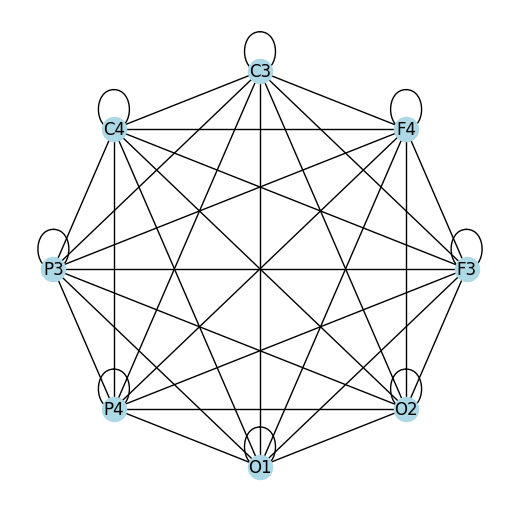

In [12]:
plt.figure(figsize=(5,5))
G = nx.from_pandas_adjacency(motor_df)
nx.draw_circular(G, with_labels = True, node_color = "lightblue")
plt.show()

Crear un diccionario de las posiciones

In [13]:
pos2D = {canal : (coordenadas_df.loc[canal, "x"],
                 coordenadas_df.loc[canal, "y"]) for canal in coordenadas_df.index}

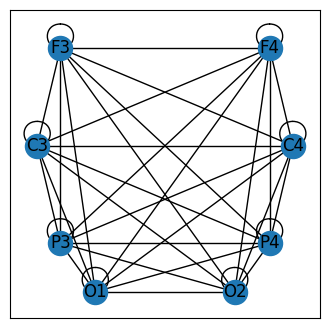

In [16]:
plt.figure(figsize = (4, 4))
nx.draw_networkx(G, pos = pos2D)
plt.show()

## incluir coordenada z --> para grafo tridimensional

In [18]:
pos3D = {canal : (coordenadas_df.loc[canal, "x"],
                 coordenadas_df.loc[canal, "y"],
                 coordenadas_df.loc[canal, "z"]) for canal in coordenadas_df.index}

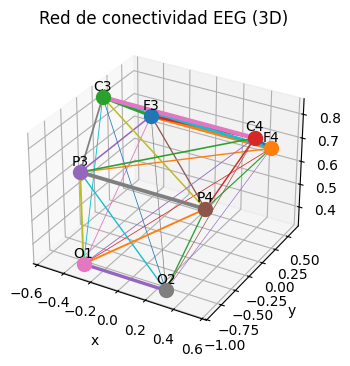

In [34]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111, projection = "3d") # para poder hacerlo 3d, lo haremos usando subplots (111 --> define la "malla" de suplots en la que vamos a trabajar)

# agregar los nodos 
for canal, (x, y, z) in pos3D.items():
    ax.scatter(x, y, z, s=100)
    ax.text(x, y, z+0.03, canal, fontsize = 10, ha="center")

# agregar las conexiones
for i, j, data in G.edges(data = True):
    x = [pos3D[i][0], pos3D[j][0]]
    y = [pos3D[i][1], pos3D[j][1]]
    z = [pos3D[i][2], pos3D[j][2]]
    ax.plot(x, y, z, linewidth = data["weight"]*5)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Red de conectividad EEG (3D)")

plt.show()


# Mapas de calor

In [36]:
import seaborn as sns

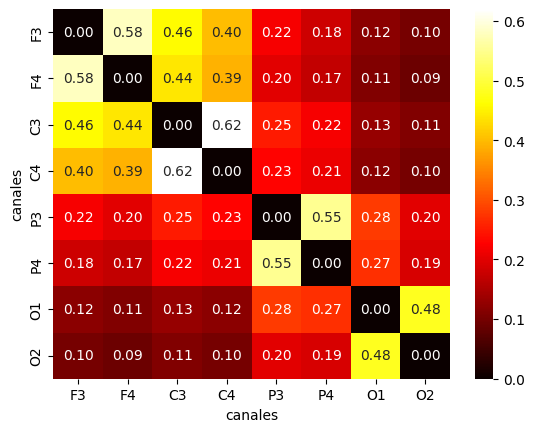

In [47]:
np.fill_diagonal(motor_df.values, 0) # motor_df.values --> genera un array
ax = sns.heatmap(motor_df.values, 
                 annot = True, cmap = "hot", fmt = ".2f",
                 xticklabels = motor_df.columns, yticklabels = motor_df.columns)
ax.set(xlabel = "canales", ylabel = "canales")
plt.show()

Aquí reemplazó los valores del dataframe original, si utilizamos fill.diagonal